


# Data Citra




In [ ]:
#import library
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random
from tensorflow.keras.preprocessing.image import load_img


In [ ]:
# Download dataset
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2025-10-01 04:05:32--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 142.250.141.207, 74.125.137.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   107MB/s    in 0.6s    

2025-10-01 04:05:33 (107 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
#Ekstrak dataset
import zipfile
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
#Definisikan path untuk data train dan data validation
import os
# base_dir = 'Datasets\\cats_and_dogs_filtered'
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

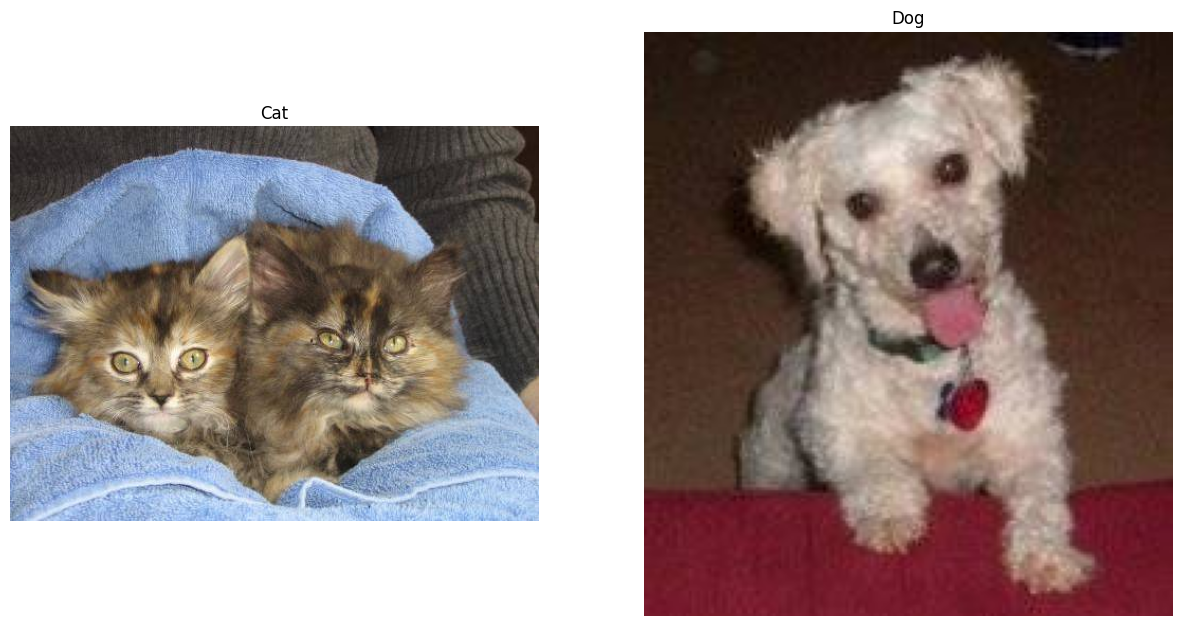

In [ ]:
#Menampilkan citra acak dari dataset


fig, ax = plt.subplots(1, 2, figsize=(15, 10))

sample_cat = random.choice(os.listdir(train_dir + "/cats"))
image_cat = load_img(train_dir + "/cats/" + sample_cat)
ax[0].imshow(image_cat)
ax[0].set_title("Cat")
ax[0].axis("Off")

sample_dog = random.choice(os.listdir(train_dir + "/dogs"))
image_dog = load_img(train_dir + "/dogs/" + sample_dog)
ax[1].imshow(image_dog)
ax[1].set_title("Dog")
ax[1].axis("Off")


plt.show()

In [ ]:
# Initialize the ImageDataGenerator with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,            # Rescaling pixel values to the range [0, 1]
    rotation_range=30,         # Randomly rotate images by ±30 degrees
    zoom_range=0.2,            # Randomly zoom images by up to 20%
    horizontal_flip=True,      # Randomly flip images horizontally
    fill_mode='nearest'        # Fill any new pixels created after transformation
)

# Apply ImageDataGenerator to the training data
train_gen = train_datagen.flow_from_directory(
    train_dir,                 # Directory containing training data
    target_size=(150, 150),    # Resize all images to 150x150
    shuffle=True,              # Shuffle the images
    batch_size=32,             # Use a batch size of 32
    class_mode='binary'        # Binary classification mode
)


Found 2000 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initialize the ImageDataGenerator for validation data (without augmentation)
datagen = ImageDataGenerator(rescale=1./255)

# Apply ImageDataGenerator to the validation data
val_gen = datagen.flow_from_directory(
    validation_dir,          # Directory containing validation data
    target_size=(150, 150),  # Resize all images to 150x150
    batch_size=32,           # Use a batch size of 32
    class_mode='binary'      # Binary classification mode
)

# Print the number of batches for both training and validation data generators
print("Batches train=%d, validation=%d" % (len(train_gen), len(val_gen)))


Found 1000 images belonging to 2 classes.
Batches train=63, validation=32


In [ ]:
# Import necessary libraries
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input
from tensorflow.keras.applications import ResNet101

# Load the ResNet101 model with pre-trained weights from ImageNet
baseModel = ResNet101(
    weights="imagenet",           # Load weights pre-trained on ImageNet
    input_tensor=Input(shape=(150, 150, 3)),  # Set the input shape for the model
    include_top=False             # Exclude the fully connected (top) layers
)


171446536/171446536 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
baseModel.trainable = False
# membekukan semua bobot model milik resnet101

In [ ]:
# Creating Fully Connected
x = baseModel.output
x = Flatten()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.2)(x)
outputs = Dense(1, activation="sigmoid")(x)
model = Model(inputs=baseModel.input, outputs=outputs)

In [ ]:
from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),  # Set the learning rate (0.001)
    loss='binary_crossentropy',           # Loss function for binary classification
    metrics=['accuracy']                  # Metrics to track during training
)

In [ ]:
# Train the model with transfer learning
history = model.fit(
    train_gen,                   # Training data generator
    epochs=20,                   # Number of epochs to train
    validation_data=val_gen      # Validation data generator
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 56s 559ms/step - accuracy: 0.4989 - loss: 1.8726 - val_accuracy: 0.6500 - val_loss: 0.6296
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 267ms/step - accuracy: 0.5956 - loss: 0.6716 - val_accuracy: 0.6320 - val_loss: 0.6417
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 270ms/step - accuracy: 0.5907 - loss: 0.6873 - val_accuracy: 0.6190 - val_loss: 0.6591
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 265ms/step - accuracy: 0.6302 - loss: 0.6547 - val_accuracy: 0.6610 - val_loss: 0.6331
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 266ms/step - accuracy: 0.5906 - loss: 0.6618 - val_accuracy: 0.6440 - val_loss: 0.6512
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 271ms/step - accuracy: 0.6133 - loss: 0.6554 - val_accuracy: 0.6470 - val_loss: 0.6346
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 265ms/step - accuracy: 0.6175 - loss: 0.6512 - val_accuracy: 0.6630 - val_loss: 0.6273
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 265ms/step - accuracy: 0.6369 - loss: 0.6353 - val_accu

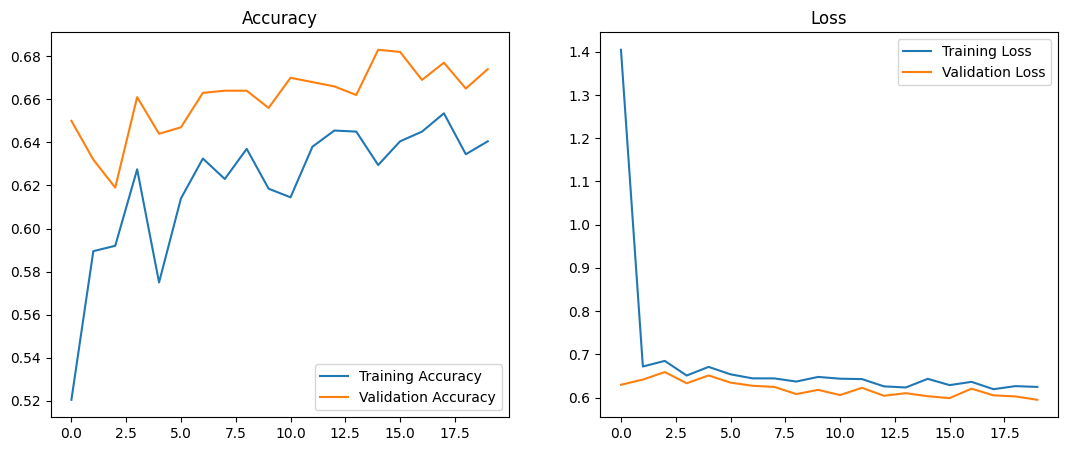

In [ ]:
import matplotlib.pyplot as plt

# Retrieve the accuracy and loss from the history object
acc = history.history['accuracy']            # Training accuracy
val_acc = history.history['val_accuracy']    # Validation accuracy
loss = history.history['loss']                # Training loss
val_loss = history.history['val_loss']        # Validation loss

# Set the number of epochs
epochs_range = range(len(acc))

# Create a figure to plot the graphs
plt.figure(figsize=(13, 5))

# Plot the accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')

# Plot the loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Loss')

# Show the plots
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_pred = model.predict(val_gen)
y_pred = np.round(y_pred)
target_names = ['cats', 'dogs']
print('classification report')
print(classification_report(val_gen.classes, y_pred, target_names=target_names))

32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step
classification report
              precision    recall  f1-score   support

        cats       0.50      0.61      0.55       500
        dogs       0.50      0.39      0.44       500

    accuracy                           0.50      1000
   macro avg       0.50      0.50      0.49      1000
weighted avg       0.50      0.50      0.49      1000






# Data Text




In [ ]:
!pip install transformers
#ini untuk model transfer learning nya menggunakan bert

In [ ]:
!pip install tensorflow

In [ ]:
import pandas as pd
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
# Data (0 = Negative, 1 = Positive)
data = [
    ("This is a positive sentence.", 1),  # Positive
    ("I didn't like this movie.", 0),  # Negative
    ("The weather is great today.", 1),  # Positive
    ("The food was terrible.", 0),  # Negative
    ("I love this, sounds like Disney Song", 1),  # Positive
    ("It is gross, I don't like this", 0),  # Negative
    ("You break my heart, break my hope", 0),  # Negative
    ("So bad and it is not good for my mental health", 0),  # Negative
    ("I like it, so amazing point", 1),  # Positive
    ("Love the sentences so much, so good", 1)  # Positive
]
texts, labels = zip(*data)

In [ ]:
#mmebagi dataset menjadi data latih dan pengujian
train_texts, test_texts, train_labels, test_labels = train_test_split(texts, labels, test_size=0.2, random_state=42)

In [ ]:
#tokenizer bert (ini digunakan untuk mengubah kalimat menjadi numerik)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
train_encodings = tokenizer(list(train_texts), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(list(test_texts), truncation=True, padding=True, max_length=128)

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), list(train_labels)))
test_dataset = tf.data.Dataset.from_tensor_slices((dict(test_encodings), list(test_labels)))

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), list(train_labels)))
test_dataset = tf.data.Dataset.from_tensor_slices((dict(test_encodings), list(test_labels)))

In [ ]:
model = TFBertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=2,
    use_safetensors=False
)

tf_model.h5:   0%|          | 0.00/536M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
!pip install tensorflow==2.12 keras==2.12

ERROR: Could not find a version that satisfies the requirement tensorflow==2.12 (from versions: 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0, 2.19.1, 2.20.0rc0, 2.20.0)
ERROR: No matching distribution found for tensorflow==2.12


In [ ]:
import tensorflow as tf

# Langkah 1: Compile dengan string identifier
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Langkah 2: Atur Learning Rate secara manual setelah compile
# Ini memastikan model menggunakan learning rate yang Anda inginkan (0.0001)
tf.keras.backend.set_value(model.optimizer.learning_rate, 0.0001)

print(f"Learning rate berhasil diatur ke: {tf.keras.backend.get_value(model.optimizer.learning_rate)}")

# Train the model
model.fit(train_dataset.shuffle(100).batch(16), epochs=20, batch_size=16)

Learning rate berhasil diatur ke: 9.999999747378752e-05
Epoch 1/20
1/1 [==============================] - 82s 82s/step - loss: 1.9361 - accuracy: 0.6250
Epoch 2/20
1/1 [==============================] - 0s 92ms/step - loss: 5.5429 - accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 0s 88ms/step - loss: 0.6065 - accuracy: 0.5000
Epoch 4/20
1/1 [==============================] - 0s 87ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5/20
1/1 [==============================] - 0s 81ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6/20
1/1 [==============================] - 0s 71ms/step - loss: 0.6931 - accuracy: 0.7500
Epoch 7/20
1/1 [==============================] - 0s 70ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 8/20
1/1 [==============================] - 0s 68ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 9/20
1/1 [==============================] - 0s 68ms/step - loss: 0.6931 - accuracy: 0.6250
Epoch 10/20
1/1 [==============================] - 0s 67ms/step - loss:

In [ ]:
loss, accuracy = model.evaluate(test_dataset.batch(16))
print(f'Loss: {loss}, Accuracy: {accuracy}')

1/1 [==============================] - 3s 3s/step - loss: 0.6931 - accuracy: 1.0000
Loss: 0.6931471824645996, Accuracy: 1.0


In [ ]:
predicitions = model.predict(test_dataset.batch(16))
predicted_classes = tf.argmax(predicitions.logits, axis=1)

1/1 [==============================] - 4s 4s/step


In [ ]:
target_names = ['negative', 'positive']
print(classification_report(test_labels, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

    negative       1.00      1.00      1.00         1
    positive       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2






# Data Tabular




In [ ]:
!pip install pytorch-tabnet

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from pytorch_tabnet.tab_model import TabNetClassifier

In [ ]:
#data
data = {
    'X1':  [1.2, 2.0, -0.5, -2.0, 3.0, 0.5, -1.0, 2.5],
    'X2': [0.8, 3.5, 2.0, -1.5, -1.0, -2.5, 1.0, -3.0],
    'label' : [0, 0, 1, 1, 0, 1, 1, 0]
}

In [ ]:
# Convert data to pandas DataFrame
df = pd.DataFrame(data)

# Split the data into features and labels
X = df[['X1', 'X2']].values
y = df['label'].values

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Initialize the TabNetClassifier
clf = TabNetClassifier()

# Train the model with early stopping and evaluation
clf.fit(
    X_train=X_train,
    y_train=y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    eval_name=["train", "test"],
    eval_metric=["accuracy"],
    max_epochs=100,
    patience=10,
    batch_size=256,
    virtual_batch_size=64,
    num_workers=0,
    drop_last=False
)

/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.50798 | train_accuracy: 0.83333 | test_accuracy: 1.0     |  0:00:00s
epoch 1  | loss: 0.34709 | train_accuracy: 0.83333 | test_accuracy: 1.0     |  0:00:00s
epoch 2  | loss: 0.23952 | train_accuracy: 0.83333 | test_accuracy: 1.0     |  0:00:00s
epoch 3  | loss: 0.18806 | train_accuracy: 0.83333 | test_accuracy: 1.0     |  0:00:00s
epoch 4  | loss: 0.13854 | train_accuracy: 0.83333 | test_accuracy: 1.0     |  0:00:00s
epoch 5  | loss: 0.10529 | train_accuracy: 0.83333 | test_accuracy: 1.0     |  0:00:00s
epoch 6  | loss: 0.07659 | train_accuracy: 0.83333 | test_accuracy: 1.0     |  0:00:00s
epoch 7  | loss: 0.05331 | train_accuracy: 0.83333 | test_accuracy: 1.0     |  0:00:00s
epoch 8  | loss: 0.03868 | train_accuracy: 0.83333 | test_accuracy: 1.0     |  0:00:00s
epoch 9  | loss: 0.02966 | train_accuracy: 0.83333 | test_accuracy: 1.0     |  0:00:00s
epoch 10 | loss: 0.02223 | train_accuracy: 0.83333 | test_accuracy: 1.0     |  0:00:00s

Early stopping occurred at epoc

/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [ ]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

# Print the predictions and the classification report
print("Predictions:", y_pred)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix to show label-specific evaluations, with 'labels' to include both classes
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
print("Confusion Matrix:\n", cm)

# Check if both classes are present in confusion matrix before calculating specific class evaluations
if cm.shape[0] == 2:  # Check if both classes (0 and 1) are present
    # Extracting specific class evaluations (Class 0 and Class 1) with zero division check
    class_0_eval = cm[0, 0] / (cm[0, 0] + cm[0, 1]) if (cm[0, 0] + cm[0, 1]) != 0 else 0  # Precision for Class 0
    class_1_eval = cm[1, 1] / (cm[1, 1] + cm[1, 0]) if (cm[1, 1] + cm[1, 0]) != 0 else 0  # Precision for Class 1

    print(f"Precision for Class 0: {class_0_eval:.2f}")
    print(f"Precision for Class 1: {class_1_eval:.2f}")
else:
    print("One or both classes are missing in the predictions.")

Predictions: [1 0]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Confusion Matrix:
 [[1 0]
 [0 1]]
Precision for Class 0: 1.00
Precision for Class 1: 1.00
